In [1]:
import pandas as pd
import numpy as np


In [2]:
import os


In [3]:
os.getcwd()

'/home/ilya/1_Study/Diploma/Input-Output_tables'

In [4]:

# Изменяем текущую директорию на 'data'
os.chdir("data")

# Проверяем, что директория изменилась
print("Текущая директория изменена на:", os.getcwd())

Текущая директория изменена на: /home/ilya/1_Study/Diploma/Input-Output_tables/data


## Data preparation

In [6]:

# Читаем конкретный лист по имени
start_year = 2017
end_year = 2023

dict_iot = dict()
for year in range(start_year, end_year+1):
    file_name = f"./IOT/{year}.xlsx"
    sheet_name = '6.'

    df_year =  pd.read_excel(file_name, sheet_name=sheet_name, index_col=0)
    dict_iot[year] = df_year

In [7]:
dict_iot.keys()

dict_keys([2017, 2018, 2019, 2020, 2021, 2022, 2023])

## Get 3rd quadrant

-2 for indexes from excel(1 for numeration from 0 in python, 1 for title)

In [8]:
indexes_3q = list(range(74,78+1)) + [81]
indexes_3q

[74, 75, 76, 77, 78, 81]

bounds for main part(A)
2:69+1

In [9]:
last_num = 69 + 1

In [10]:
tmp = dict_iot[2017]
tmp

,Unnamed: 1,Unnamed: 2,"Продукция сельского хозяйства, охоты и связанные с этим услуги","Продукция лесного хозяйства, лесозаготовок и услуг в этих областях",Рыба и продукция рыболовства прочая; аквакультура; услуги вспомогательные в области рыболовства,Уголь каменный и лигнит,Нефть сырая,Газ природный в жидком или газообразном состоянии,Руды железные,Руды металлов цветных,...,"Расходы на конечное потребление органов государственного управления, всего",Расходы на конечное потребление НКООДХ,"Конечное потребление, всего",Валовое накопление основного капитала,Изменение запасов материальных оборотных средств,Приобретение минус выбытие ценностей,"Валовое накопление, всего",Экспорт товаров и услуг,Конечный спрос,Общий спрос на товары и услуги
NaN,код,NaN,1,2,3,5,61,62,71,72,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
№,NaN,NaN,1,2,3,4,5,6,7,8,...,71.0,72.0,7.300000e+01,74.0,75.0,76.0,77.0,78.0,7.900000e+01,8.000000e+01
1,01,"Продукция сельского хозяйства, охоты и связанн...",461672857,0,0,0,17638,0,0,0,...,71898746.0,0.0,2.754379e+09,87225842.0,164504782.0,0.0,251730624.0,344659038.0,3.350768e+09,4.569645e+09
2,02,"Продукция лесного хозяйства, лесозаготовок и у...",144315,6108690,0,53927,0,0,0,0,...,33523348.0,0.0,3.552180e+07,0.0,-848842.0,0.0,-848842.0,1013370.0,3.568633e+07,5.070148e+07
3,03,Рыба и продукция рыболовства прочая; аквакульт...,1894,0,317,0,2,0,0,0,...,0.0,0.0,9.953788e+07,0.0,498136.0,0.0,498136.0,100849.0,1.001369e+08,1.021845e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,NaN,"Прибыль, смешанный доход",1489107038,3250443,74077028,82907593,3218367106,92830535,97891837,447141516,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78,NaN,Валовая добавленная стоимость,2353207687,26697195,79058750,256808032,5621312824,164124810,217822104,1235724135,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79,NaN,Выпуск в основных ценах,4168134624,46340935,99847424,484583500,9861852700,287933900,443892800,2468950900,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80,NaN,Импорт товаров и услуг,401510275,4360542,2337093,8847432,4857981,130250187,12790555,266037379,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
tmp.iloc[indexes_3q, 1]

73                      Использовано в ценах покупателя
74                                         Оплата труда
75    Другие налоги на производство за вычетом субсидий
76                       Потребление основного капитала
77                             Прибыль, смешанный доход
80                               Импорт товаров и услуг
Name: Unnamed: 2, dtype: object

In [12]:
dict_df_3q = dict()
for year in dict_iot.keys():
    iot = dict_iot[year]
    tmp = iot.iloc[indexes_3q, 2:last_num]
    tmp.fillna(0, inplace=True)  # Заменяем NaN на 0
    tmp = tmp.astype('int64')
    dict_df_3q[year] = tmp

In [13]:
dict_df_3q.keys()

dict_keys([2017, 2018, 2019, 2020, 2021, 2022, 2023])

In [14]:
dict_df_3q_norm = dict()
for year in dict_df_3q.keys():
    df_copy = dict_df_3q[year].copy()    

    column_sums = df_copy.sum(axis=0)
    
    normalized_df = df_copy.div(column_sums.replace(0, np.nan)).fillna(0)
    normalized_df.astype('float64')
    dict_df_3q_norm[year] = normalized_df


In [15]:
print(dict_df_3q_norm.keys())

dict_keys([2017, 2018, 2019, 2020, 2021, 2022, 2023])


In [16]:
tmp = dict_df_3q_norm[2017]

In [18]:
with pd.ExcelWriter('3quadrant_normalized_by1q.xlsx') as writer:
    for key, value in  dict_df_3q_norm.items():
        value.to_excel(writer, sheet_name=str(key), index=False)

print("Данные успешно записаны в файл на разные листы.")


Данные успешно записаны в файл на разные листы.


In [19]:
tmp.columns[tmp.iloc[5, :] > 0.1]

Index(['Газ природный в жидком или газообразном состоянии',
       'Продукты пищевые и напитки', 'Изделия табачные', 'Текстиль',
       'Предметы одежды', 'Кожа и изделия, относящиеся к ней',
       'Древесина и изделия из древесины и пробки (кроме мебели), изделия из соломки и материалов для плетения',
       'Бумага и изделия бумажные', 'Продукция печей коксовых',
       'Продукты переработки нефти',
       'Вещества химические и продукты химические',
       'Продукты фармацевтические и препараты фармацевтические основные',
       'Изделия резиновые и пластмассовые',
       'Изделия минеральные неметаллические прочие',
       'Металлы черные основные: железо, чугун, сталь и ферросплавы',
       'Трубы разных диаметров, профили полые и фитинги для труб разных диаметров из стали',
       'Изделия стальные прочие, полученные путем первичной обработки',
       'Услуги производства литейного',
       'Изделия металлические готовые, кроме машин и оборудования',
       'Компьютеры, продукци

Агрегация в большие области

In [20]:
def aggregation_big_sph(A, Y, agr_list):
    s = len(agr_list)
    B = np.zeros([s, s])
    Y_new = np.zeros(s)
    for (k, num_i) in enumerate(agr_list):
        for (l, num_j) in enumerate(agr_list):
            x_j = Y[num_j]
            tmp = A[num_i, :]
            a_ij = tmp[:, num_j]
            B[k, l] = np.sum(a_ij @ x_j) / np.sum(x_j)
        x_j = Y[num_i]
        Y_new[k] = np.sum(x_j)
    return B, Y_new


Деление с практикума

Производство 29-34 \
Сельхоз 0-2 \
Недропользование 3-9 \
Обрабатывающая 18-28 \
Услуги 43-67 без 55-58 \
Лёгкая промышленность 10-17 + 35,36, 37 \
Инфраструктура 38-42 \
Услуги фин 55-58 





Сопостовлять по добавленной стоимости

In [21]:
tmp = dict_df_3q[2017]
tmp.iloc[:, 29:34+1] # производство
tmp.iloc[:, 0:2+1] # сельхоз
tmp.iloc[:, 3:9+1] # Недропользование
tmp.iloc[:, 18:28+1] # Обрабатывающая
tmp.iloc[:, [i for i in range(10, 17+1)] + [i for i in range(35, 37+1)]] # Лёгкая промышленность
tmp.iloc[:, [i for i in range(43, 67+1) if not 55 <= i <= 58]] # Услуги
tmp.iloc[:, 55:58+1] # Услуги фин
tmp.iloc[:, 38:42+1] # Инфраструктура

,Услуги по производству и распределению электроэнергии,Газ отопительный; услуги по распределению топлива газообразного трубопроводного,Услуги по снабжению паром и воздухом охлажденным,"Водоснабжение; канализационная система, услуги по сбору и удалению отходов",Работы строительные
73,658433838,103065930,163010958,163479897,2789480339
74,315088250,61232661,95182355,111056904,916546024
75,10006404,1044647,3040266,2177192,7689312
76,137728066,26359497,40066735,31615139,273207828
77,120891741,22247731,37975286,24664904,869909728
80,50138484,6303590,10031524,18770670,602246786


In [22]:
tmp = dict_df_3q[2017]

# Создаем словарь с названиями групп и соответствующими индексами колонок
groups = {
    "Сельхоз": list(range(0, 3)),
    "Недропользование": list(range(3, 10)),
    "Лёгкая промышленность": list(range(10, 18)) + list(range(35, 38)),
    "Обрабатывающая": list(range(18, 29)),
    "Производство": list(range(29, 35)),
    "Инфраструктура": list(range(38, 43)),
    "Услуги": [i for i in range(43, 68) if not 55 <= i <= 58],
    "Услуги фин": list(range(55, 59))
}

# Создаем новый DataFrame с суммами по каждой группе
dict_df_3q_aggr = dict()
dict_df_3q_aggr_norm_col = dict()
#dict_df_3q_aggr_norm_row = dict()

for year in dict_df_3q.keys():
    df_3q_aggr = pd.DataFrame(index=tmp.index)
    df_3q_aggr_norm_col = pd.DataFrame(index=tmp.index)
    tmp = dict_df_3q[year]
    for group_name, columns in groups.items():
        df_3q_aggr[group_name] = tmp.iloc[:, columns].sum(axis=1)
        
        
    dict_df_3q_aggr[year] = df_3q_aggr
    row_sums = np.sum(df_3q_aggr, axis=1)
    normalized_df = df_3q_aggr.div(row_sums, axis=0).fillna(0)
    dict_df_3q_aggr_norm_col[year] = normalized_df


In [23]:
dict_df_3q_aggr_norm_col[2017]

,Сельхоз,Недропользование,Лёгкая промышленность,Обрабатывающая,Производство,Инфраструктура,Услуги,Услуги фин
73,0.052955,0.184519,0.049182,0.129663,0.012836,0.110670,0.402513,0.057662
74,0.039059,0.113966,0.035789,0.065324,0.008774,0.095060,0.578255,0.063774
75,0.005542,0.521123,0.014538,0.084603,0.004924,0.039833,0.235672,0.093765
76,0.048888,0.317656,0.023236,0.059360,0.005608,0.091072,0.350169,0.104012
77,0.059092,0.154750,0.036105,0.075020,0.006521,0.040579,0.428290,0.199643
80,0.030548,0.033085,0.161006,0.258319,0.339385,0.051449,0.120506,0.005702


In [24]:
dict_df_3q_aggr_norm_col[2020]

,Сельхоз,Недропользование,Лёгкая промышленность,Обрабатывающая,Производство,Инфраструктура,Услуги,Услуги фин
73,0.064180,0.143775,0.052012,0.129826,0.020754,0.112407,0.420534,0.056512
74,0.048303,0.105769,0.034760,0.072147,0.012208,0.093029,0.574253,0.059531
75,0.006208,0.499692,0.015413,0.111647,0.007797,0.038369,0.268906,0.051969
76,0.065329,0.234467,0.026036,0.066546,0.009230,0.091429,0.386563,0.120399
77,0.075399,0.122721,0.045289,0.082913,0.012675,0.047638,0.425526,0.187840
80,0.023336,0.027722,0.160650,0.232878,0.437599,0.008781,0.101804,0.007229


In [25]:
with pd.ExcelWriter('3quadrant_aggr_normalized_by1q.xlsx') as writer:
    for key, value in  dict_df_3q_aggr_norm_col.items():
        value.to_excel(writer, sheet_name=str(key), index=False)

print("Данные успешно записаны в файл на разные листы.")


Данные успешно записаны в файл на разные листы.


In [26]:
with pd.ExcelWriter('3quadrant_aggr_by1q.xlsx') as writer:
    for key, value in  dict_df_3q_aggr.items():
        value.to_excel(writer, sheet_name=str(key), index=False)

print("Данные успешно записаны в файл на разные листы.")


Данные успешно записаны в файл на разные листы.


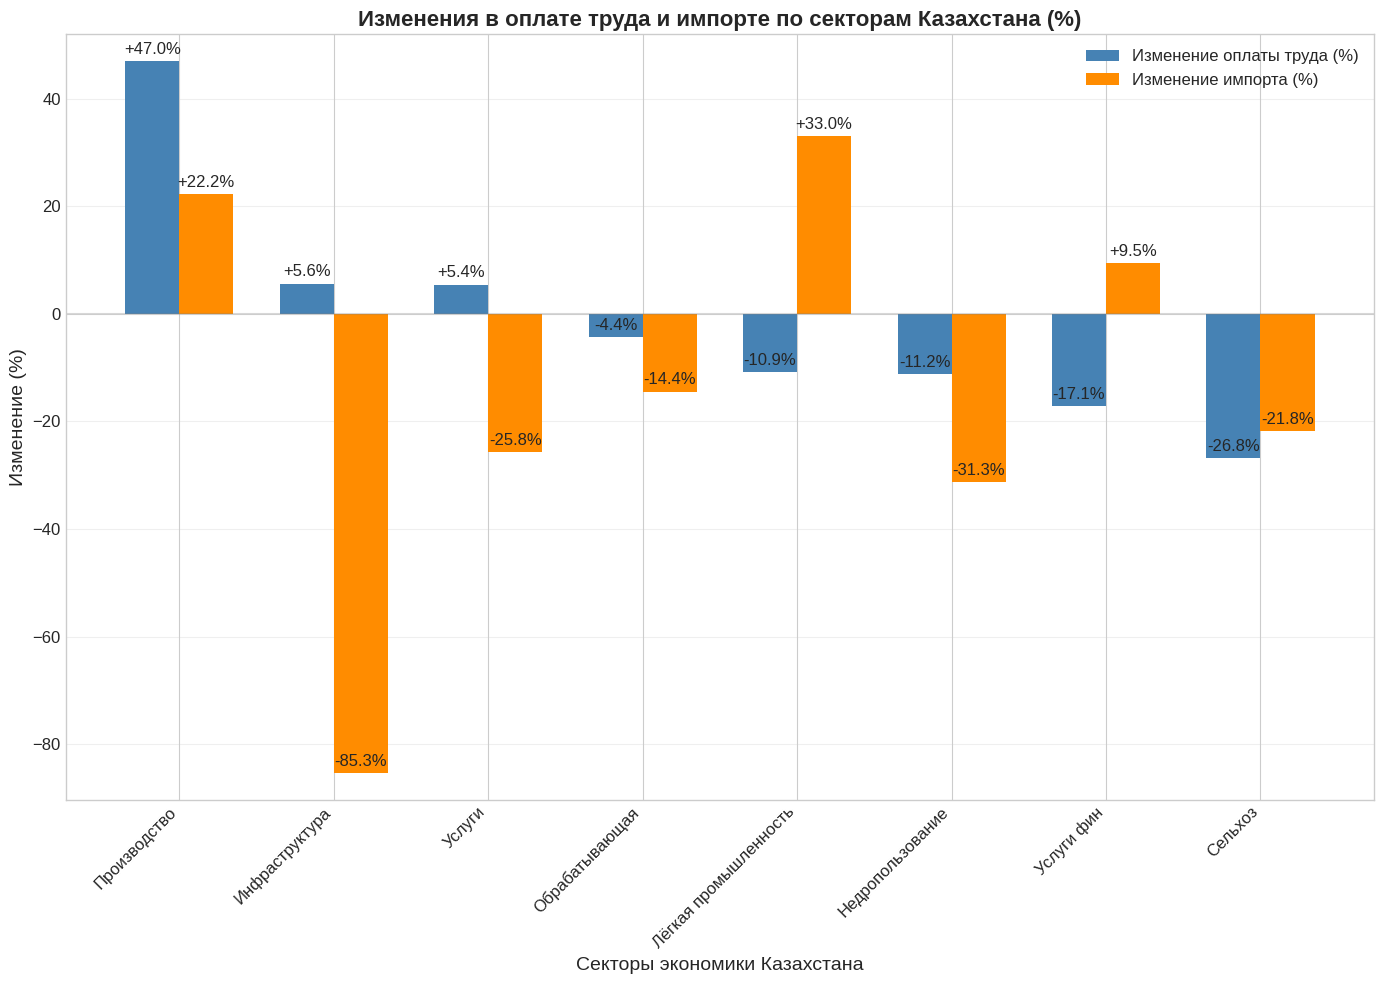

Изменения в оплате труда и импорте (%):
                  Сектор  Изменение оплаты труда (%)  Изменение импорта (%)
4           Производство                   46.957734              22.249886
5         Инфраструктура                    5.621509             -85.280311
6                 Услуги                    5.438696             -25.757364
3         Обрабатывающая                   -4.372548             -14.444284
2  Лёгкая промышленность                  -10.852247              33.023644
1       Недропользование                  -11.192090             -31.262190
7             Услуги фин                  -17.141010               9.484042
0                Сельхоз                  -26.847044             -21.780838


In [27]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Настройка стиля для графиков
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Загрузка данных из Excel файла
def load_data_from_excel(file_path):
    # Чтение всех листов (годов) из файла
    excel_data = pd.read_excel(file_path, sheet_name=None, header=0)
    years = sorted([int(year) for year in excel_data.keys()])
    
    # Извлечение данных по оплате труда (строка 2) и импорту (строка 6)
    labor_data = {}
    import_data = {}
    
    # Получаем названия секторов из первого листа
    first_sheet = excel_data[str(years[0])]
    sectors = first_sheet.columns.tolist()
    
    # Инициализируем словари для каждого сектора
    for sector in sectors:
        labor_data[sector] = []
        import_data[sector] = []
    
    # Заполняем данные для каждого года
    for year in years:
        sheet = excel_data[str(year)]
        
        # Оплата труда (строка 2, индекс 1)
        labor_row = sheet.iloc[1]
        
        # Импорт (строка 6, индекс 5)
        import_row = sheet.iloc[5]
        
        for sector in sectors:
            labor_data[sector].append(labor_row[sector])
            import_data[sector].append(import_row[sector])
    
    return years, sectors, labor_data, import_data

# Загружаем данные
years, sectors, labor_data, import_data = load_data_from_excel('3quadrant_aggr_normalized_by1q.xlsx')

# Рассчитываем процентные изменения между 2017 и 2023
labor_changes = {}
import_changes = {}

for sector in sectors:
    labor_first = labor_data[sector][0]
    labor_last = labor_data[sector][-1]
    labor_changes[sector] = ((labor_last - labor_first) / labor_first * 100)
    
    import_first = import_data[sector][0]
    import_last = import_data[sector][-1]
    import_changes[sector] = ((import_last - import_first) / import_first * 100)

# Создаем DataFrame для изменений
df_changes = pd.DataFrame({
    'Сектор': sectors,
    'Изменение оплаты труда (%)': [labor_changes[sector] for sector in sectors],
    'Изменение импорта (%)': [import_changes[sector] for sector in sectors]
})

# Сортируем по изменению оплаты труда
df_changes = df_changes.sort_values('Изменение оплаты труда (%)', ascending=False)

# Создаем график изменений
fig, ax = plt.subplots(figsize=(14, 10))

x = np.arange(len(df_changes['Сектор']))
width = 0.35

# Создаем столбцы для оплаты труда и импорта
bars1 = ax.bar(x - width/2, df_changes['Изменение оплаты труда (%)'], width, label='Изменение оплаты труда (%)', color='steelblue')
bars2 = ax.bar(x + width/2, df_changes['Изменение импорта (%)'], width, label='Изменение импорта (%)', color='darkorange')

# Добавляем значения над столбцами
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        sign = "+" if height > 0 else ""
        ax.annotate(f'{sign}{height:.1f}%',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bars1)
add_labels(bars2)

# Настройка осей и легенды
ax.set_xlabel('Секторы экономики Казахстана', fontsize=14)
ax.set_ylabel('Изменение (%)', fontsize=14)
ax.set_title('Изменения в оплате труда и импорте по секторам Казахстана (%)', fontsize=16, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(df_changes['Сектор'], rotation=45, ha='right', fontsize=12)
ax.legend(fontsize=12)

# Добавляем горизонтальную линию на нуле
ax.axhline(y=0, color='gray', linestyle='-', alpha=0.3)

# Добавляем сетку для лучшей читаемости
ax.grid(True, axis='y', alpha=0.3)

# Устанавливаем диапазон оси Y с небольшим запасом
max_val = max(max(df_changes['Изменение оплаты труда (%)']), max(df_changes['Изменение импорта (%)']))
min_val = min(min(df_changes['Изменение оплаты труда (%)']), min(df_changes['Изменение импорта (%)']))
ax.set_ylim([min_val - 5, max_val + 5])

plt.tight_layout()
plt.savefig('labor_import_changes.png', dpi=300, bbox_inches='tight')
plt.show()

# Вывод данных изменений для проверки
print("Изменения в оплате труда и импорте (%):")
print(df_changes)

Ключевые секторы для анализа оплаты труда: ['Производство', 'Сельхоз', 'Услуги фин', 'Недропользование']
Ключевые секторы для анализа импорта: ['Инфраструктура', 'Лёгкая промышленность', 'Недропользование', 'Услуги']


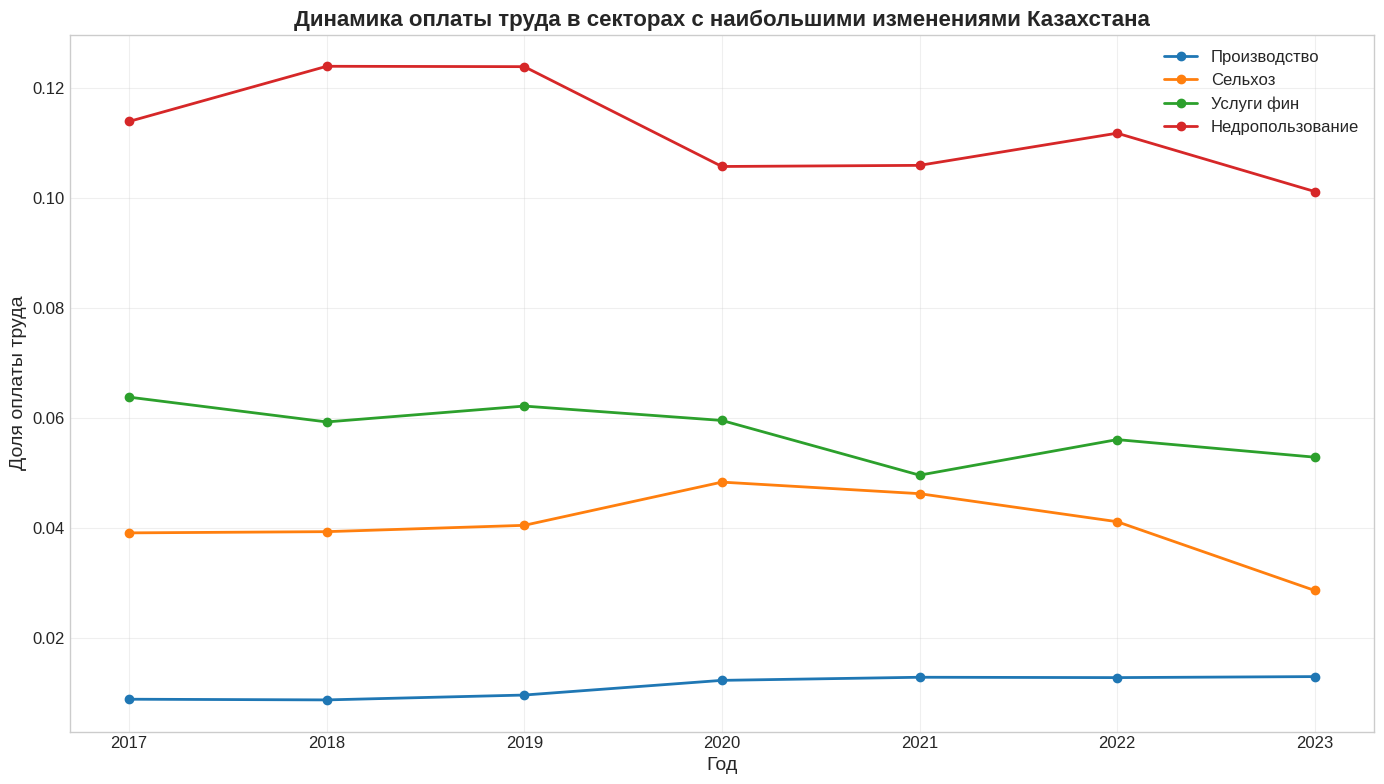

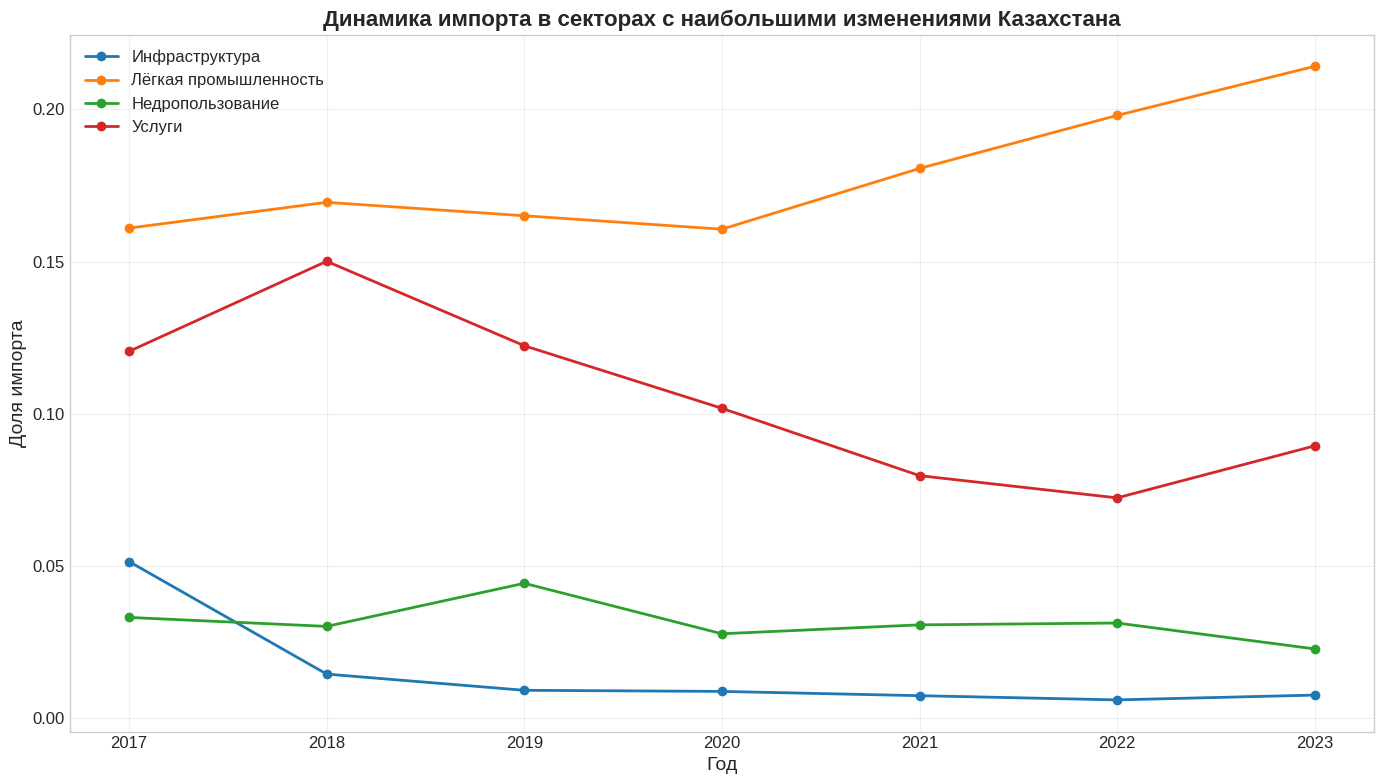

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Настройка стиля для графиков
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Загрузка данных из Excel файла
def load_data_from_excel(file_path):
    # Чтение всех листов (годов) из файла
    excel_data = pd.read_excel(file_path, sheet_name=None, header=0)
    years = sorted([int(year) for year in excel_data.keys()])
    
    # Извлечение данных по оплате труда (строка 2) и импорту (строка 6)
    labor_data = {}
    import_data = {}
    
    # Получаем названия секторов из первого листа
    first_sheet = excel_data[str(years[0])]
    sectors = first_sheet.columns.tolist()
    
    # Инициализируем словари для каждого сектора
    for sector in sectors:
        labor_data[sector] = []
        import_data[sector] = []
    
    # Заполняем данные для каждого года
    for year in years:
        sheet = excel_data[str(year)]
        
        # Оплата труда (строка 2, индекс 1)
        labor_row = sheet.iloc[1]
        
        # Импорт (строка 6, индекс 5)
        import_row = sheet.iloc[5]
        
        for sector in sectors:
            labor_data[sector].append(labor_row[sector])
            import_data[sector].append(import_row[sector])
    
    return years, sectors, labor_data, import_data

# Загружаем данные
years, sectors, labor_data, import_data = load_data_from_excel('3quadrant_aggr_normalized_by1q.xlsx')

# Создаем DataFrame для динамики оплаты труда
df_labor = pd.DataFrame(labor_data, index=years)

# Создаем DataFrame для динамики импорта
df_import = pd.DataFrame(import_data, index=years)

# Выбираем ключевые секторы для анализа оплаты труда
# Определяем их на основе наибольших изменений
labor_changes = {}
for sector in sectors:
    labor_first = labor_data[sector][0]
    labor_last = labor_data[sector][-1]
    labor_changes[sector] = abs((labor_last - labor_first) / labor_first * 100)

# Выбираем 4 сектора с наибольшими изменениями в оплате труда
top_labor_sectors = sorted(labor_changes.items(), key=lambda x: x[1], reverse=True)[:4]
key_labor_sectors = [sector for sector, _ in top_labor_sectors]

# Выбираем ключевые секторы для анализа импорта
import_changes = {}
for sector in sectors:
    import_first = import_data[sector][0]
    import_last = import_data[sector][-1]
    import_changes[sector] = abs((import_last - import_first) / import_first * 100)

# Выбираем 4 сектора с наибольшими изменениями в импорте
top_import_sectors = sorted(import_changes.items(), key=lambda x: x[1], reverse=True)[:4]
key_import_sectors = [sector for sector, _ in top_import_sectors]

print("Ключевые секторы для анализа оплаты труда:", key_labor_sectors)
print("Ключевые секторы для анализа импорта:", key_import_sectors)

# Визуализация динамики оплаты труда в 
plt.figure(figsize=(14, 8))

for sector in key_labor_sectors:
    plt.plot(years, df_labor[sector], marker='o', linewidth=2, label=sector)

plt.title('Динамика оплаты труда в секторах с наибольшими изменениями Казахстана', fontsize=16, fontweight='bold')
plt.xlabel('Год', fontsize=14)
plt.ylabel('Доля оплаты труда', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)
plt.xticks(years)
plt.tight_layout()
plt.savefig('labor_key_sectors.png', dpi=300, bbox_inches='tight')
plt.show()

# Визуализация динамики импорта в ключевых секторах
plt.figure(figsize=(14, 8))

for sector in key_import_sectors:
    plt.plot(years, df_import[sector], marker='o', linewidth=2, label=sector)

plt.title('Динамика импорта в секторах с наибольшими изменениями Казахстана', fontsize=16, fontweight='bold')
plt.xlabel('Год', fontsize=14)
plt.ylabel('Доля импорта', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)
plt.xticks(years)
plt.tight_layout()
plt.savefig('import_key_sectors.png', dpi=300, bbox_inches='tight')
plt.show()

Процентное изменение оплаты труда :
Производство: 46.96%
Инфраструктура: 5.62%
Услуги: 5.44%
Обрабатывающая: -4.37%
Лёгкая промышленность: -10.85%
Недропользование: -11.19%
Услуги фин: -17.14%
Сельхоз: -26.85%

Процентное изменение импорта :
Лёгкая промышленность: 33.02%
Производство: 22.25%
Услуги фин: 9.48%
Обрабатывающая: -14.44%
Сельхоз: -21.78%
Услуги: -25.76%
Недропользование: -31.26%
Инфраструктура: -85.28%


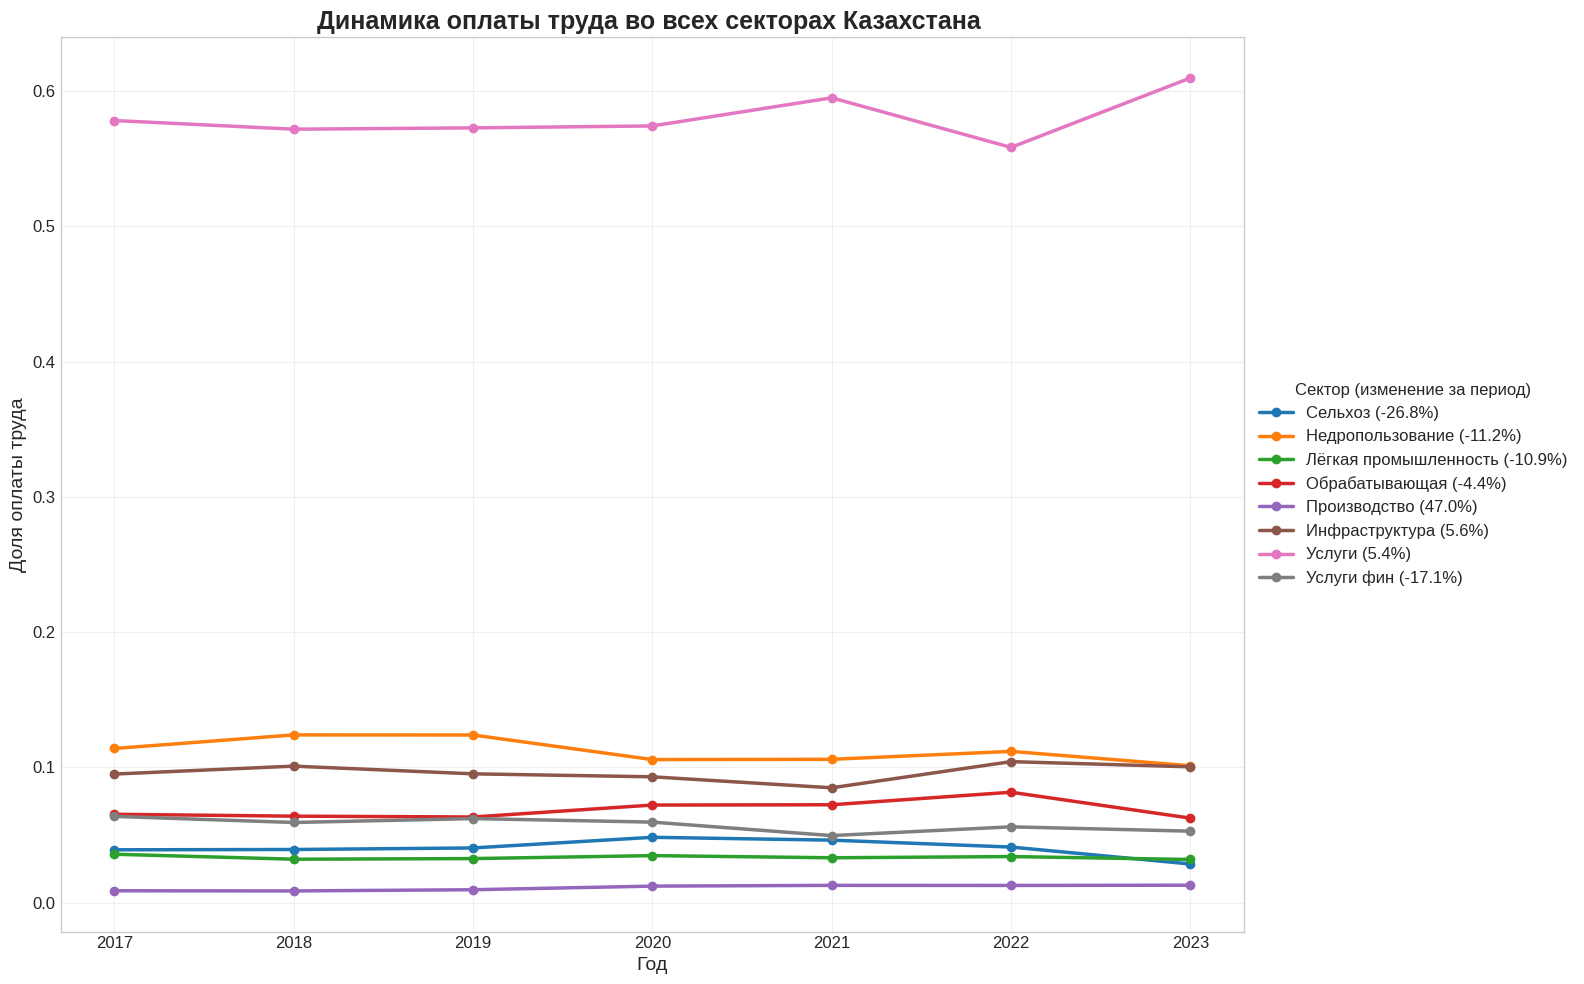

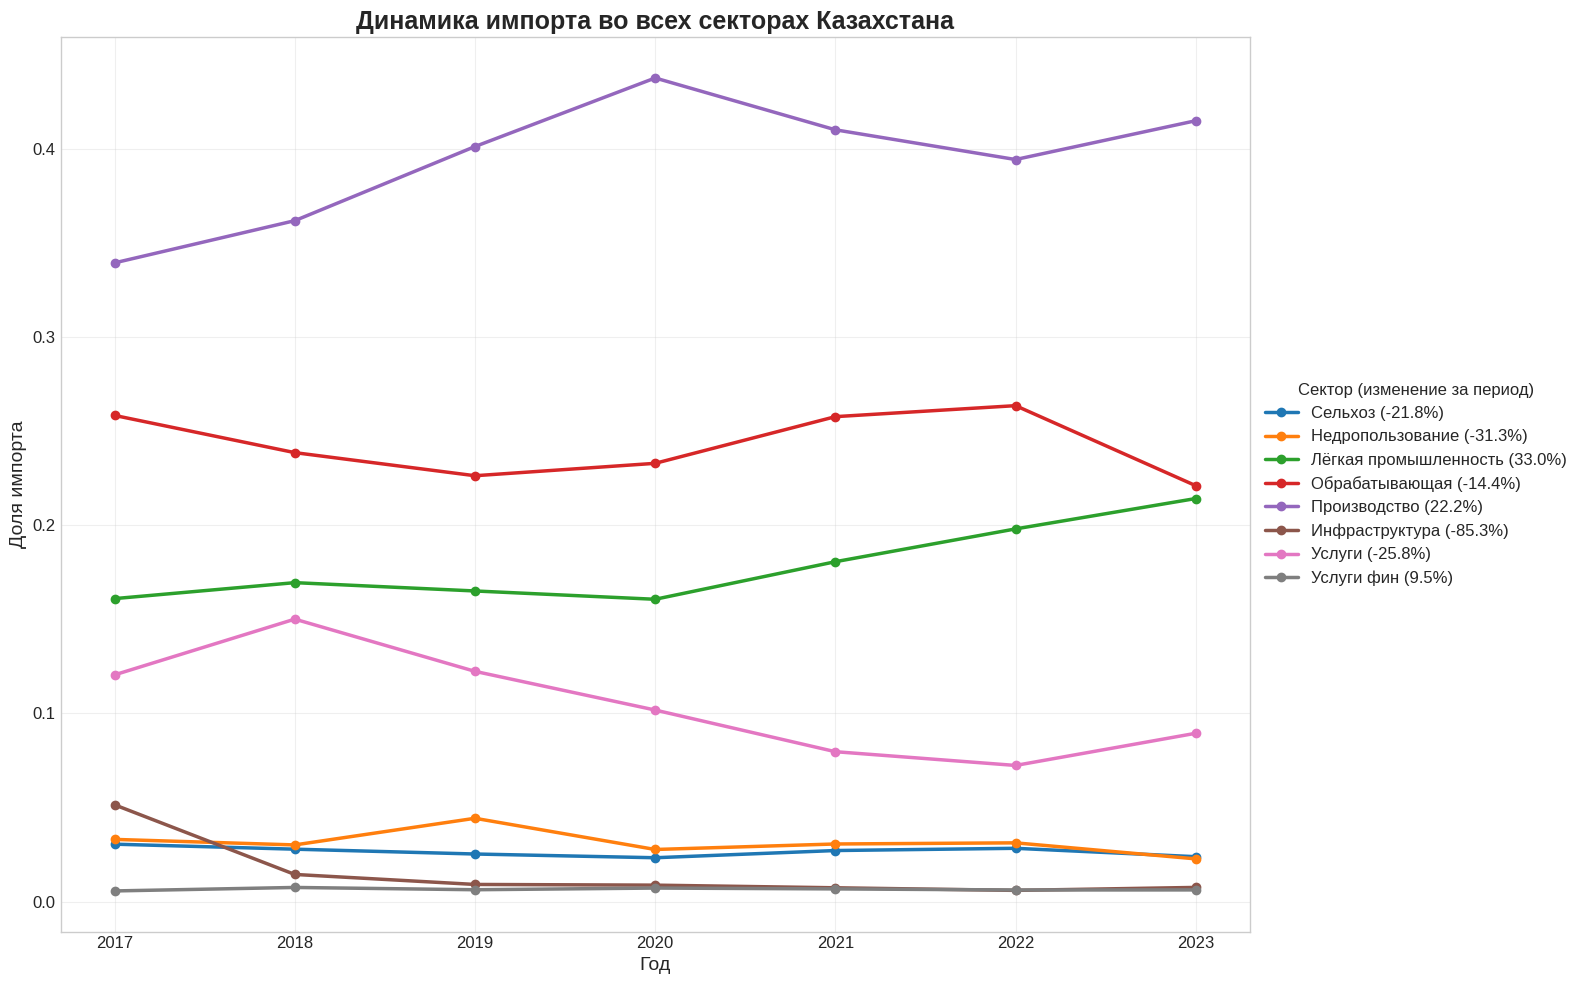

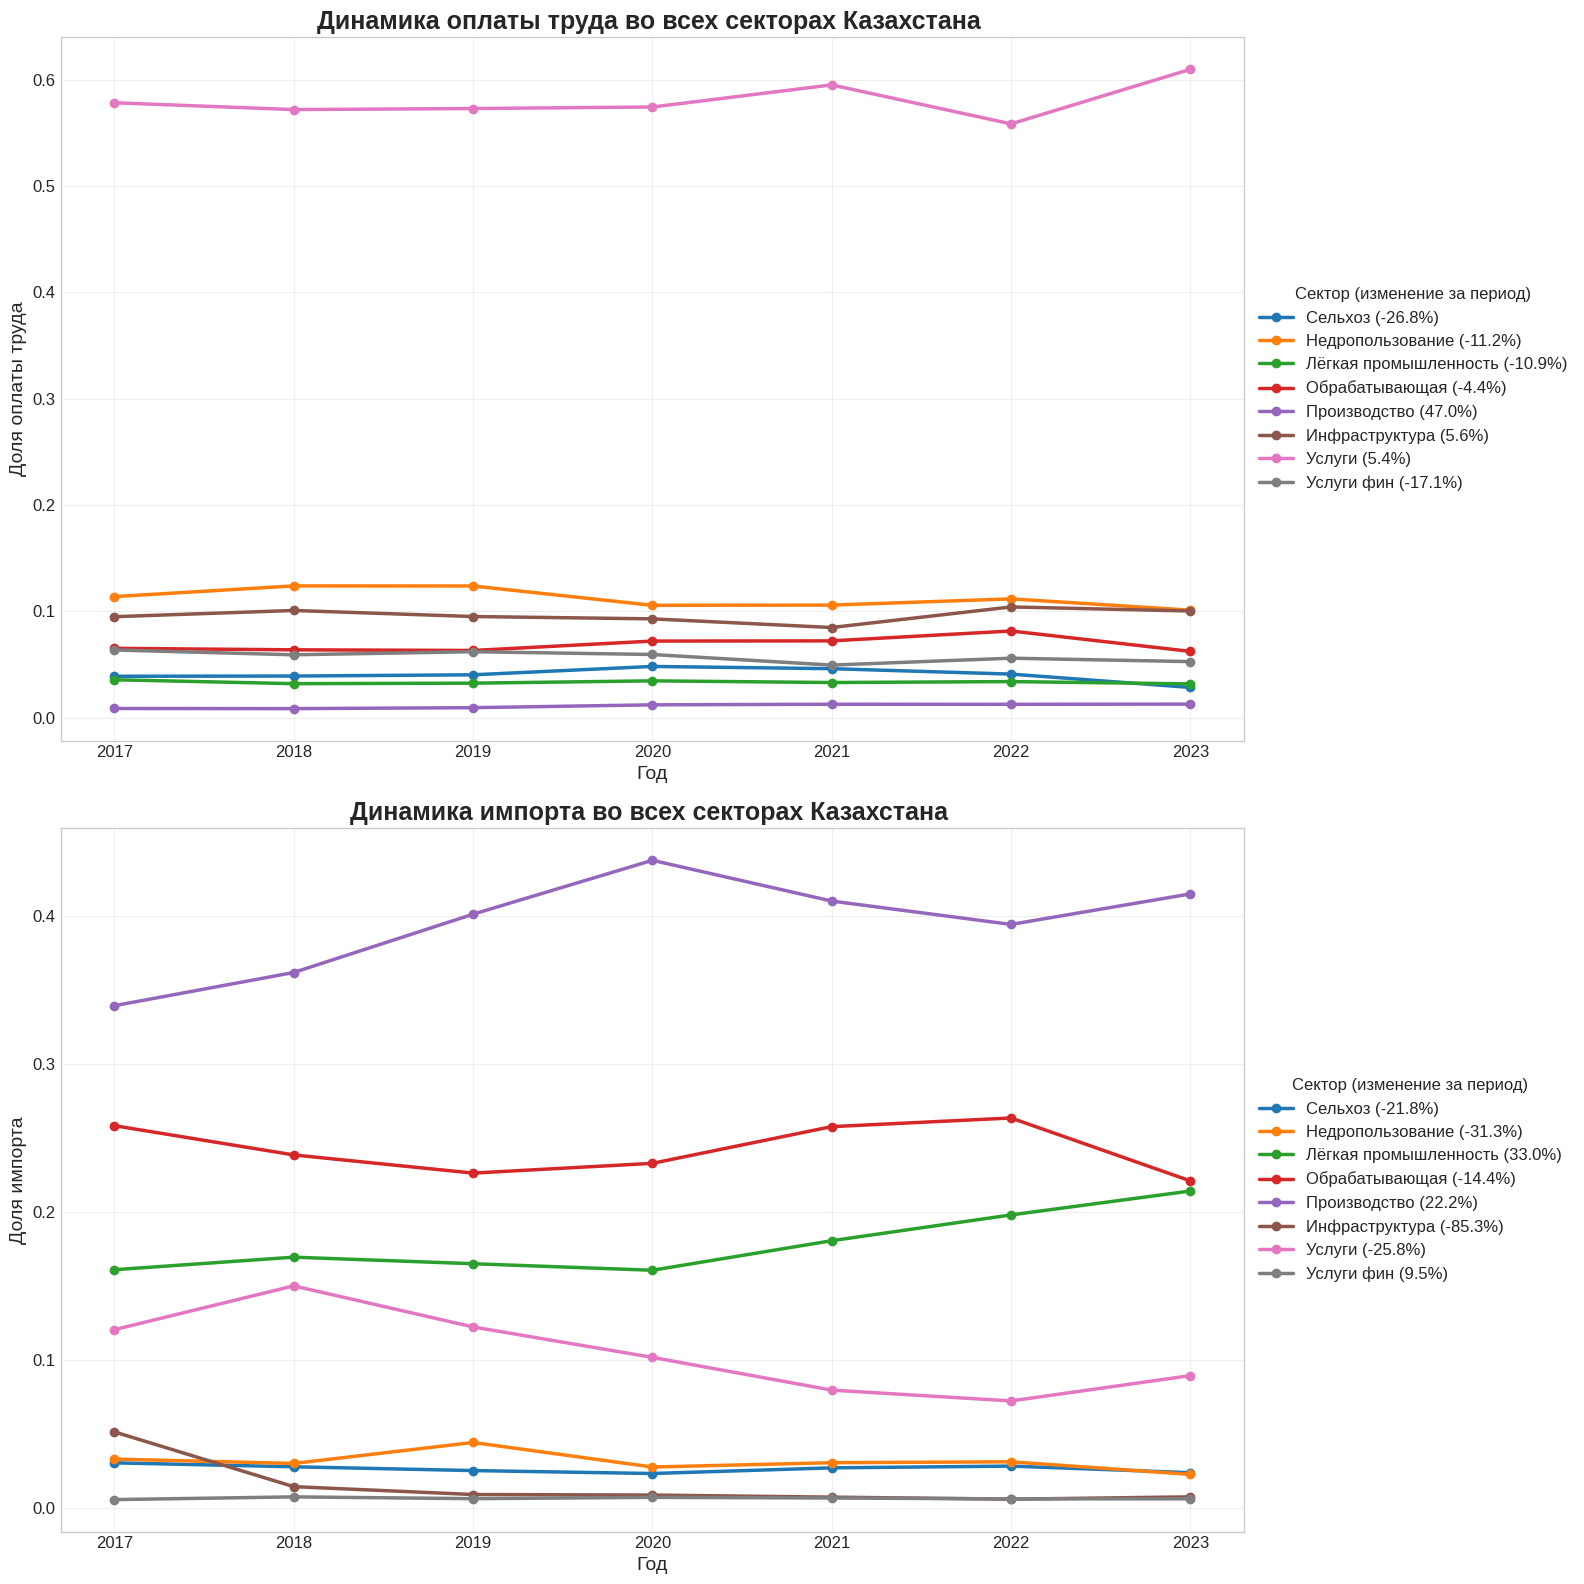

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Настройка стиля для графиков
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (16, 10)
plt.rcParams['font.size'] = 12

# Загрузка данных из Excel файла
def load_data_from_excel(file_path):
    # Чтение всех листов (годов) из файла
    excel_data = pd.read_excel(file_path, sheet_name=None, header=0)
    years = sorted([int(year) for year in excel_data.keys()])
    
    # Извлечение данных по оплате труда (строка 2) и импорту (строка 6)
    labor_data = {}
    import_data = {}
    
    # Получаем названия секторов из первого листа
    first_sheet = excel_data[str(years[0])]
    sectors = first_sheet.columns.tolist()
    
    # Инициализируем словари для каждого сектора
    for sector in sectors:
        labor_data[sector] = []
        import_data[sector] = []
    
    # Заполняем данные для каждого года
    for year in years:
        sheet = excel_data[str(year)]
        
        # Оплата труда (строка 2, индекс 1)
        labor_row = sheet.iloc[1]
        
        # Импорт (строка 6, индекс 5)
        import_row = sheet.iloc[5]
        
        for sector in sectors:
            labor_data[sector].append(labor_row[sector])
            import_data[sector].append(import_row[sector])
    
    return years, sectors, labor_data, import_data

# Загружаем данные
years, sectors, labor_data, import_data = load_data_from_excel('3quadrant_aggr_normalized_by1q.xlsx')

# Создаем DataFrame для динамики оплаты труда
df_labor = pd.DataFrame(labor_data, index=years)

# Создаем DataFrame для динамики импорта
df_import = pd.DataFrame(import_data, index=years)

# Рассчитываем процентные изменения между 2017 и 2023
labor_percent_changes = {}
import_percent_changes = {}

for sector in sectors:
    labor_first = labor_data[sector][0]
    labor_last = labor_data[sector][-1]
    labor_percent_changes[sector] = ((labor_last - labor_first) / labor_first * 100)
    
    import_first = import_data[sector][0]
    import_last = import_data[sector][-1]
    import_percent_changes[sector] = ((import_last - import_first) / import_first * 100)

# Вывод процентных изменений для проверки
print("Процентное изменение оплаты труда :")
for sector, change in sorted(labor_percent_changes.items(), key=lambda x: x[1], reverse=True):
    print(f"{sector}: {change:.2f}%")

print("\nПроцентное изменение импорта :")
for sector, change in sorted(import_percent_changes.items(), key=lambda x: x[1], reverse=True):
    print(f"{sector}: {change:.2f}%")

# Определяем цвета для каждого сектора
colors = plt.cm.tab10.colors

# Визуализация динамики оплаты труда для всех секторов
plt.figure(figsize=(16, 10))
for i, sector in enumerate(sectors):
    plt.plot(years, df_labor[sector], marker='o', linewidth=2.5, 
             label=f"{sector} ({labor_percent_changes[sector]:.1f}%)", color=colors[i % len(colors)])

plt.title('Динамика оплаты труда во всех секторах Казахстана ', 
          fontsize=18, fontweight='bold')
plt.xlabel('Год', fontsize=14)
plt.ylabel('Доля оплаты труда', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12, loc='center left', bbox_to_anchor=(1, 0.5), title="Сектор (изменение за период)")
plt.xticks(years)
plt.tight_layout()
plt.savefig('labor_all_sectors.png', dpi=300, bbox_inches='tight')
plt.show()

# Визуализация динамики импорта для всех секторов
plt.figure(figsize=(16, 10))
for i, sector in enumerate(sectors):
    plt.plot(years, df_import[sector], marker='o', linewidth=2.5, 
             label=f"{sector} ({import_percent_changes[sector]:.1f}%)", color=colors[i % len(colors)])

plt.title('Динамика импорта во всех секторах Казахстана', 
          fontsize=18, fontweight='bold')
plt.xlabel('Год', fontsize=14)
plt.ylabel('Доля импорта', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12, loc='center left', bbox_to_anchor=(1, 0.5), title="Сектор (изменение за период)")
plt.xticks(years)
plt.tight_layout()
plt.savefig('import_all_sectors.png', dpi=300, bbox_inches='tight')
plt.show()

# Дополнительно: создаем субграфики для лучшей читаемости
fig, axs = plt.subplots(2, 1, figsize=(16, 16))

# Оплата труда
for i, sector in enumerate(sectors):
    axs[0].plot(years, df_labor[sector], marker='o', linewidth=2.5, 
             label=f"{sector} ({labor_percent_changes[sector]:.1f}%)", color=colors[i % len(colors)])

axs[0].set_title('Динамика оплаты труда во всех секторах Казахстана ', 
          fontsize=18, fontweight='bold')
axs[0].set_xlabel('Год', fontsize=14)
axs[0].set_ylabel('Доля оплаты труда', fontsize=14)
axs[0].grid(True, alpha=0.3)
axs[0].legend(fontsize=12, loc='center left', bbox_to_anchor=(1, 0.5), title="Сектор (изменение за период)")
axs[0].set_xticks(years)

# Импорт
for i, sector in enumerate(sectors):
    axs[1].plot(years, df_import[sector], marker='o', linewidth=2.5, 
             label=f"{sector} ({import_percent_changes[sector]:.1f}%)", color=colors[i % len(colors)])

axs[1].set_title('Динамика импорта во всех секторах Казахстана ', 
          fontsize=18, fontweight='bold')
axs[1].set_xlabel('Год', fontsize=14)
axs[1].set_ylabel('Доля импорта', fontsize=14)
axs[1].grid(True, alpha=0.3)
axs[1].legend(fontsize=12, loc='center left', bbox_to_anchor=(1, 0.5), title="Сектор (изменение за период)")
axs[1].set_xticks(years)

plt.tight_layout()
plt.savefig('labor_import_all_sectors_subplots.png', dpi=300, bbox_inches='tight')
plt.show()